<b>Introduction</b>

The objective of this project was to develop a machine learning model capable of classifying images of guava plants, identifying different diseases (Anthracnose, Healthy Guava, Fruit Fly)."

<b>Methods:</b> <hr>
Model Architecture: The model was based on a Convolutional Neural Network (CNN), with several convolutional and dense layers.<br>
Data Augmentation: Data augmentation techniques like random rotation, zoom, and flipping were used to increase the diversity of the training data.<br>
Tools and Frameworks: The project was implemented using TensorFlow for model training and MLflow for experiment tracking.<br>

<div style="display: flex; justify-content: space-around;">
    <img src="reports/raport_images/anthracnose_sample.png" width="300" height="200"/>
    <img src="reports/raport_images/fruit_fly_sample.png" width="300" height="200"/>
    <img src="reports/raport_images/healthy_guava_sample.png" width="300" height="200"/>
</div>

In [2]:
from modules.data_preprocessing.load_images import get_filenames_and_labels
from modules.data_preprocessing.data_visualization import (
    show_labels_count,
    show_labels_chart,
)
from modules.data_preprocessing.split_data import split_data

from modules.model_report.classification_report_model import get_classification_report

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

In [3]:
FOLDER_BASE = r"attrib\GuavaDiseaseDataset"
LABELS_DICT = {"Anthracnose": 0, "healthy_guava": 1, "fruit_fly": 2}
NUM_CLASSES = 3

<b>Dataset</b>

The dataset used for this project consists of images representing three different classes of guava plants: 'Healthy_guava', 'Anthracnose', and 'Fruit_fly'. The dataset contains a total of nearly 3,000 images, with varying counts per class (Healthy_guava: 922 images, Anthracnose: 1,538 images, Fruit_fly: 1306 images).

<b>Images preprocessing</b>

Images were resized to 512x512 pixels to ensure consistency in input data. Data augmentation techniques such as random rotation, zoom, and flipping were applied to prevent overfitting and enhance model robustness

In [4]:
filenames, labels = get_filenames_and_labels(FOLDER_BASE)

In [5]:
sorted_labels_count = dict(sorted(show_labels_count(labels).items()))
sorted_labels_count

{0: 1538, 1: 922, 2: 1306}

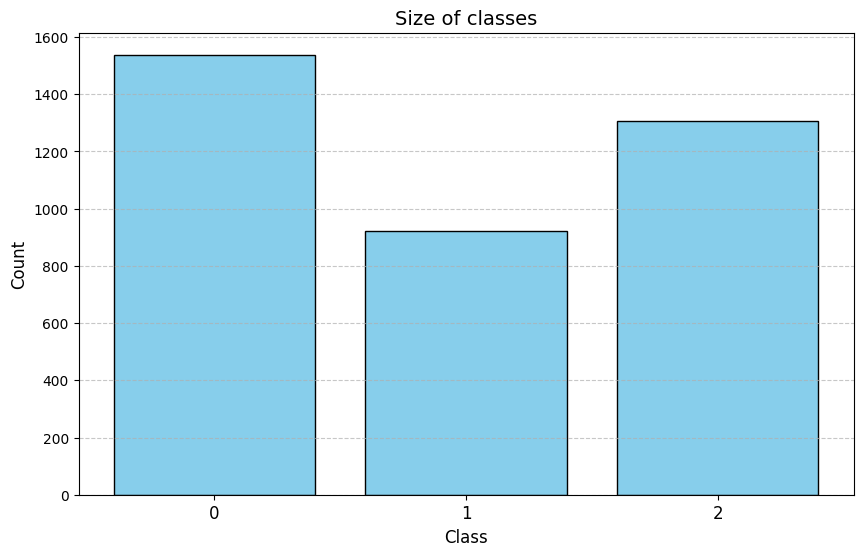

In [6]:
show_labels_chart(sorted_labels_count)

<b>Model Loading</b>

In [7]:
best_model = load_model(
    "trained_models/model_conv8_16_32_dense64-data_augmentation_2.keras"
)

<b>Model layers</b>

The model consists of several convolutional layers followed by dense layers. It starts with a convolutional layer with 16 filters of size 3x3, followed by a max pooling layer. After a series of convolutions and pooling, the model ends with three dense layers, including the final output layer with three units corresponding to the three classes of diseases."

Data augmentation was applied via a series of layers in the model, such as random zoom, rotation, translation, and flipping, to increase the variability of the training data and improve model generalization.

In [8]:
best_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 512, 512, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 512, 512, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 256, 256, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,019 (97.73 KB)

 Trainable params: 8,339 (32.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,680 (65.16 KB)

<b>Model training</b>

The model was trained using the Adam optimizer with a learning rate of 0.001, sparse categorical cross-entropy loss function, and accuracy as the evaluation metric. Training was carried out for 20 epochs with a batch size of 32. Validation data was used to monitor overfitting.

<div style="display: flex; justify-content: space-around;">
    <img src="reports/raport_images/model_training_chart.png" width="1920" height="800"/>
</div>

<b>MLflow Integration</b>

MLflow was used to track the performance of different model configurations during the training process. Various experiments were run with different combinations of hyperparameters, and the results were compared to select the best-performing model.

<div style="display: flex; justify-content: space-around;">
    <img src="reports/raport_images/mlflow.png" width="" height="1440"/>
</div>

<b>Model Evaluation</b>

The classification report reveals the precision, recall, and F1-score for each class. Precision represents the accuracy of positive predictions, while recall indicates the ability of the model to identify all relevant instances of each class. The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics.

In [9]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(filenames, labels)
y_test = to_categorical(y_test, num_classes=NUM_CLASSES)

In [10]:
print(get_classification_report(best_model, X_test, y_test))

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step 
              precision    recall  f1-score   support

     Class 0       0.95      0.99      0.97       325
     Class 1       1.00      0.80      0.89       179
     Class 2       0.92      1.00      0.95       249

    accuracy                           0.95       753
   macro avg       0.96      0.93      0.94       753
weighted avg       0.95      0.95      0.95       753

